In [68]:
import pandas as pd
import numpy as np
df = pd.read_csv("Medical Appoinment No show.csv")

In [69]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [70]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [71]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['No-show'] = df['No-show'].map({'Yes':1, 'No':0})


In [77]:
print(crosstab)
print(crosstab.dtypes)
df['No-show'] = df['No-show'].map({'No':0, 'Yes':1})
crosstab = pd.crosstab(df['No-show'], df['SMS_received'])
print(crosstab)


Empty DataFrame
Columns: []
Index: []
Series([], dtype: object)
Empty DataFrame
Columns: []
Index: []


In [84]:
print(df.columns.tolist())


['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']


In [85]:
df.columns = df.columns.str.strip()  # remove leading/trailing spaces


In [86]:
print(df['No-show'].unique())
print(df[['No-show','SMS_received']].head(10))


[nan]
   No-show  SMS_received
0      NaN             0
1      NaN             0
2      NaN             0
3      NaN             0
4      NaN             0
5      NaN             0
6      NaN             0
7      NaN             0
8      NaN             0
9      NaN             0


In [89]:
import pandas as pd

def load_clean_appointments(path):
    df = pd.read_csv('Medical Appoinment No show.csv')

    # 2. Clean column names (strip spaces, replace special chars)
    df.columns = df.columns.str.strip().str.replace("-", "_").str.replace(" ", "_")

    # 3. Find 'No-show' column (now 'No_show' after cleaning)
    if "No_show" not in df.columns:
        raise KeyError(" Could not find 'No-show' column. Check your dataset columns.")

    # 4. Standardize values in No-show column
    df["No_show"] = df["No_show"].astype(str).str.strip().str.lower()
    df["No_show"] = df["No_show"].map({"no": 0, "yes": 1})

    # 5. Ensure SMS_received is numeric
    if "SMS_received" in df.columns:
        df["SMS_received"] = pd.to_numeric(df["SMS_received"], errors="coerce").fillna(0).astype(int)

    return df
    
df = load_clean_appointments("Medical Appoinment No show.csv")
print(df.head())
print(df["No_show"].value_counts())


      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received  No_show  
0         0           0        0             0        0  
1         0           0        0    

SMS_received      0      1
No_show                   
0             62510  25698
1             12535   9784


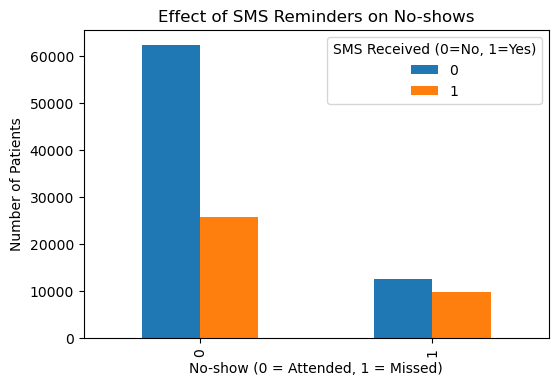

In [90]:
import matplotlib.pyplot as plt

crosstab = pd.crosstab(df["No_show"], df["SMS_received"])
print(crosstab)

crosstab.plot(kind="bar", figsize=(6,4))
plt.xlabel("No-show (0 = Attended, 1 = Missed)")
plt.ylabel("Number of Patients")
plt.title("Effect of SMS Reminders on No-shows")
plt.legend(title="SMS Received (0=No, 1=Yes)")
plt.show()


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Drop high-cardinality columns
X = df.drop(["No_show", "PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay"], axis=1)

# One-hot encode only low-cardinality categorical variables
X = pd.get_dummies(X, columns=["Gender", "Neighbourhood"], drop_first=True)

# Target
y = df["No_show"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(max_depth=6, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Confusion Matrix:
 [[26497    28]
 [ 6607    27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     26525
           1       0.49      0.00      0.01      6634

    accuracy                           0.80     33159
   macro avg       0.65      0.50      0.45     33159
weighted avg       0.74      0.80      0.71     33159



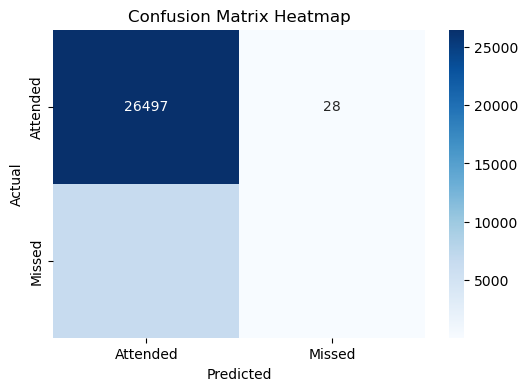

In [94]:

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Attended", "Missed"], yticklabels=["Attended", "Missed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


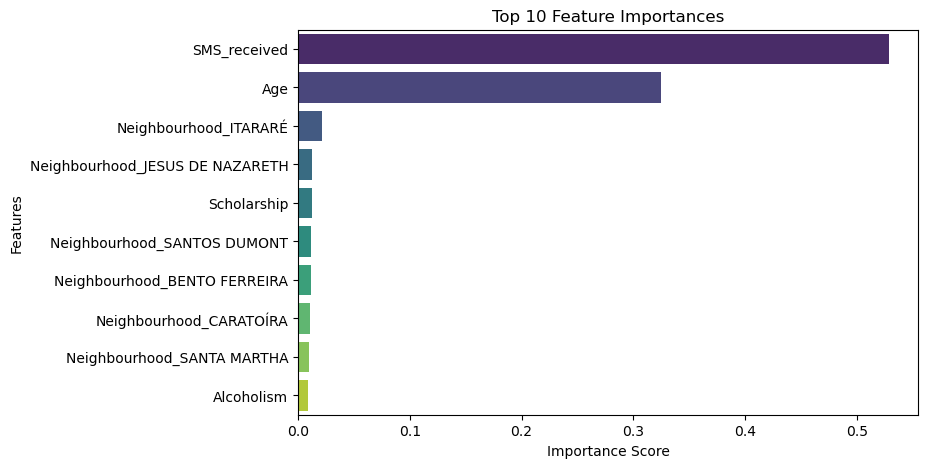

In [96]:

# Get feature importances from the trained model
importances = model.feature_importances_

# Match them with feature names
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10], palette="viridis")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
